References:
    * https://www.kaggle.com/vukglisovic/classification-combining-lda-and-word2vec# 

## Load

In [1]:
import pandas as pd
data = pd.read_csv('dataset.tsv', sep='\t', index_col=0)

In [2]:
data.clean_text = data.clean_text.apply(eval)
data.bow = data.bow.apply(eval)
data.entities = data.entities.apply(eval)

In [3]:
data.index = pd.Index(list(range(len(data))))

## LDA features

In [4]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel, LdaMulticore

In [5]:
corpus = data.bow
dictionary = Dictionary(documents=data.clean_text.values)
print("Found {} words.".format(len(dictionary.values())))

Found 1882 words.


In [6]:
num_topics = 500
#A multicore approach to decrease training time
LDAmodel = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics,
                        workers=4,
                        chunksize=4000,
                        passes=7,
                        alpha='asymmetric')

/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [7]:
import numpy as np

In [8]:
def document_to_lda_features(lda_model, document):
    topic_importances = LDAmodel.get_document_topics(document, minimum_probability=0)
    topic_importances = np.array(topic_importances)
    return topic_importances[:,1]

In [9]:
data['lda_features'] = list(map(lambda doc:
                                      document_to_lda_features(LDAmodel, doc),
                                      data.bow))

In [10]:
X_lda = np.array(list(map(np.array, data.lda_features)))

## Clustering

In [11]:
K = len(data['intent'].unique())

In [12]:
X = X_lda
y = data['intent']

In [13]:
X.shape, y.shape

((3305, 500), (3305,))

---

In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [15]:
from sklearn.mixture import GaussianMixture

In [38]:
km = KMeans(K).fit(X)

In [87]:
km = AgglomerativeClustering(K).fit(X)

In [93]:
km = GaussianMixture(K, tol=1e-6, max_iter=500).fit(X)

---

In [39]:
comp = pd.DataFrame(data[['text', 'intent']])

In [40]:
comp['clusters'] = km.predict(X)

In [41]:
comp['clusters'] = km.labels_

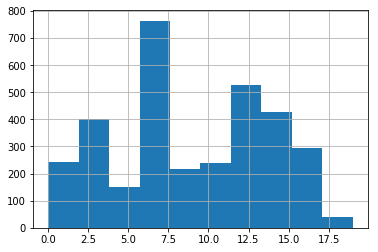

In [96]:
comp['clusters'].hist().get_figure().savefig('w2v/figure.pdf')

In [124]:
r = pd.pivot_table(comp, index='intent', columns='clusters', aggfunc=len, fill_value=0)\
            .style.background_gradient(axis=1)

In [125]:
r

In [105]:
from sklearn.metrics import *

In [106]:
def purity_score(y_true, y_pred):
    contingency_matrix = cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

## GO

10 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture
20 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture
30 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture
50 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


100 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


150 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


200 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


300 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


400 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


500 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


550 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


600 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


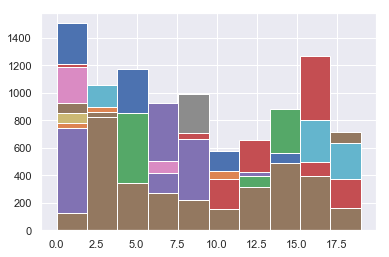

In [315]:
raw_results = []
cms = []
np.random.seed(0)

for num_topics in [10, 20, 30, 50, 100, 150, 200, 300, 400, 500, 550, 600]:
    LDAmodel = LdaMulticore(corpus=corpus,
                            id2word=dictionary,
                            num_topics=num_topics,
                            workers=4,
                            chunksize=4000,
                            passes=7,
                            alpha='asymmetric')
    data['lda_features'] = list(map(lambda doc:
                                      document_to_lda_features(LDAmodel, doc),
                                      data.bow))
    X = np.array(list(map(np.array, data.lda_features)))
    print('%d features'%num_topics)
    for model in [KMeans, AgglomerativeClustering, GaussianMixture]:
        print('\t %s'%str(model).split('.')[-1][:-2])
        try:
            km = model(K, tol=1e-6, max_iter=500).fit(X)
        except:
            km = model(K).fit(X)


        comp = pd.DataFrame(data[['text', 'intent']])
        try:
            comp['clusters'] = km.labels_
        except:
            comp['clusters'] = km.predict(X)

        comp['clusters'].hist().get_figure().savefig('lda/hist_%d.pdf'%num_topics)
        cms += [pd.pivot_table(comp, index='intent', columns='clusters', aggfunc=len, fill_value=0)\
                    .style.background_gradient(axis=1)]
        raw_results += [(
            purity_score(comp['intent'], comp['clusters']),
            silhouette_score(X, comp['clusters']),
            homogeneity_score(comp['intent'], comp['clusters']),
            completeness_score(comp['intent'], comp['clusters']),
            num_topics,
            str(model).split('.')[-1][:-2])
        ]

In [316]:
results = pd.DataFrame(raw_results,
                       columns=['purity', 'silhouette', 'homogeneity', 
                                'completeness', 'features num', 'model'])


In [317]:
results['AVG'] = results[results.columns.difference(['model', 'features num'])].apply(np.mean, axis=1)

In [318]:
import seaborn as sns; sns.set()

In [326]:
results.to_csv('lda/scores.csv')

In [319]:
results.style.background_gradient(axis=0)

,purity,silhouette,homogeneity,completeness,features num,model,AVG
0,0.25053,0.518061,0.158969,0.1784,10,KMeans,0.27649
1,0.254766,0.465678,0.164473,0.180273,10,AgglomerativeClustering,0.266297
2,0.255673,0.401029,0.149051,0.178109,10,GaussianMixture,0.245966
3,0.272315,0.460403,0.177428,0.191404,20,KMeans,0.275387
4,0.265053,0.444393,0.169149,0.185645,20,AgglomerativeClustering,0.26606
5,0.240242,0.230031,0.157998,0.169562,20,GaussianMixture,0.199458
6,0.270802,0.443329,0.175203,0.188137,30,KMeans,0.269368
7,0.271407,0.437236,0.1711,0.182631,30,AgglomerativeClustering,0.265594
8,0.212405,0.112642,0.12696,0.134575,30,GaussianMixture,0.146646
9,0.252648,0.374933,0.157183,0.178186,50,KMeans,0.240737


In [322]:
results.groupby('features num').mean()

,purity,silhouette,homogeneity,completeness,AVG
features num,,,,,
10,0.253656,0.461589,0.157498,0.178928,0.262918
20,0.259203,0.378276,0.168191,0.182203,0.246968
30,0.251538,0.331069,0.157755,0.168448,0.227202
50,0.240545,0.287032,0.147430,0.166824,0.210458
100,0.266465,0.187596,0.168647,0.189221,0.202982
150,0.256077,0.167888,0.161589,0.185054,0.192652
200,0.263843,0.149212,0.175117,0.194913,0.195771
300,0.250025,0.151526,0.165607,0.184314,0.187868
400,0.272718,0.192777,0.177547,0.192270,0.208828


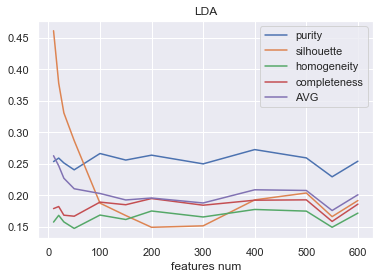

In [324]:
results.groupby('features num').mean().plot(title='LDA').get_figure().savefig('report/lda_scores.png')

In [327]:
cms[27]

## Quick easy classifier

- 10 fold cross validation on 100 examples from labelled data
- Feed forward network
- Input = sequence of word representations

In [16]:
LDAmodel = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=500,
                        workers=4,
                        chunksize=4000,
                        passes=7,
                        alpha='asymmetric')
data['lda_features'] = list(map(lambda doc:
                                  document_to_lda_features(LDAmodel, doc),
                                  data.bow))

/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [17]:
X = np.array(list(map(np.array, data.lda_features)))
y = data['intent']

In [18]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

def balanced_sample_maker(X, y, sample_size=None, random_seed=36):
    uniq_levels = np.unique(y)
    uniq_counts = {level: sum(y == level) for level in uniq_levels}

    if not sample_size:
        sample_size = round(min(uniq_counts.values()))
    
    if not random_seed is None:
        np.random.seed(random_seed)

    # find observation index of each class levels
    groupby_levels = {}
    for ii, level in enumerate(uniq_levels):
        obs_idx = [idx for idx, val in enumerate(y) if val == level]
        groupby_levels[level] = obs_idx
    # oversampling on observations of each label
    balanced_copy_idx = []
    for gb_level, gb_idx in groupby_levels.items():
        over_sample_idx = np.random.choice(gb_idx, size=sample_size, replace=False).tolist()
        balanced_copy_idx+=over_sample_idx
    np.random.shuffle(balanced_copy_idx)

    left_idx = [i for i in range(len(X)) if i not in balanced_copy_idx]
    
    data_train=X[balanced_copy_idx]
    labels_train=y[balanced_copy_idx]
    
    data_test=X[left_idx]
    labels_test=y[left_idx]
    
    if  ((len(data_train)) == (sample_size*len(uniq_levels))):
        print('number of sampled example ', sample_size*len(uniq_levels), 'number of sample per class ', sample_size, ' #classes: ', len(list(set(uniq_levels))))
    else:
        print('number of samples is wrong ')

    labels, values = zip(*Counter(labels_train).items())
    print('number of classes ', len(list(set(labels_train))))
    check = all(x == values[0] for x in values)
    print(check)
    if check == True:
        print('Good all classes have the same number of examples')
    else:
        print('Repeat again your sampling your classes are not balanced')
    indexes = np.arange(len(labels))
    width = 0.5
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.show()
    return data_train,labels_train, data_test, labels_test

number of sampled example  2160 number of sample per class  108  #classes:  20
number of classes  20
True
Good all classes have the same number of examples


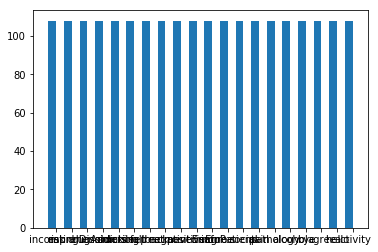

In [19]:
X,y,_,_=balanced_sample_maker(X,y.values)

number of sampled example  1720 number of sample per class  86  #classes:  20
number of classes  20
True
Good all classes have the same number of examples


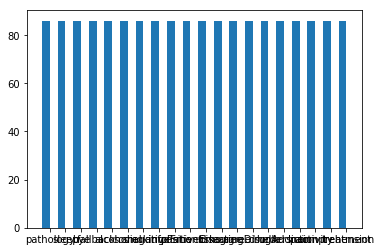

In [20]:
X_train, y_train, X_test, y_test = balanced_sample_maker(X,y, 86)

In [21]:
from sklearn.model_selection import cross_validate

In [22]:
from sklearn.svm import SVC

In [23]:
clf = SVC(kernel='linear', C=1, random_state=0, probability=True).fit(X_train, y_train)

In [24]:
clf.score(X_test, y_test)

0.2909090909090909

In [25]:
clf.predict(X_test[:40])

array(['agree', 'pain', 'bye', 'treatment', 'pain', 'pain', 'treatment',
       'agree', 'treatment', 'social', 'treatment', 'social', 'disagree',
       'agree', 'treatment', 'bye', 'drugAddiction', 'infoPatient',
       'agree', 'social', 'activity', 'infoPatient', 'positiveEmo',
       'pain', 'infoPatient', 'bye', 'risk', 'pain', 'social', 'pain',
       'agree', 'alcohol', 'agree', 'infoPatient', 'social', 'social',
       'treatment', 'bye', 'agree', 'eatingDisorders'], dtype=object)

In [26]:
scores = cross_validate(clf, X, y, scoring='accuracy', cv=5,
                             return_estimator=True)

In [27]:
print('{:2.3} + {:2.3}%'.format(np.mean(scores['train_score']), np.std(scores['train_score'])))

0.321 + 0.00692%


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [28]:
print('{:2.3} + {:2.3}%'.format(np.mean(scores['test_score']), np.std(scores['test_score'])))

0.286 + 0.0141%


In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
cv_scores = cross_val_score(clf, X_test, y_test, cv=10) 

In [65]:
cv_scores

array([0.23333333, 0.25      , 0.25      , 0.25      , 0.175     ,
       0.175     , 0.25      , 0.25      , 0.2       , 0.35      ])

In [66]:
print('{:2.3} + {:2.3}%'.format(np.mean(cv_scores), np.std(cv_scores)))

0.238 + 0.0476%


In [29]:
from sklearn.metrics import confusion_matrix

In [37]:
clf_res = pd.DataFrame([clf.predict(X_test), y_test]).T
clf_res.columns = ['class', 'intent']

In [31]:
X_lda = np.array(list(map(np.array, data.lda_features)))
data['label'] = clf.predict(X_lda)

In [32]:
data[data.label=='incomprehension'][['intent', 'label', 'text', 'clean_text']]

,intent,label,text,clean_text
137,drugAddiction,incomprehension,"I have been off suboxone for 103 days, can't b...","[suboxone, _num_, day, believe, _num_, year]"
498,drugAddiction,incomprehension,I've stopped the Ritalin but have one strip of...,"[stop, ritalin, one, strip, suboxone, leave]"
500,drugAddiction,incomprehension,I started abusing pain pills heavily and incre...,"[start, abuse, pain, pill, heavily, increase, ..."
504,drugAddiction,incomprehension,I started suboxone 6 days ago and I'm having a...,"[start, suboxone, _num_, day, ago, lot, pain, ..."
582,drugAddiction,incomprehension,I first got on weed,"[_num_, get, wee]"
949,pain,incomprehension,This pain was were few days ago,"[pain, day, ago]"
1058,pathology,incomprehension,something is wrong with my heart,"[something, wrong, heart]"
1069,pathology,incomprehension,it burns when i urinate,"[burn, urinate]"
1082,pathology,incomprehension,one side of my body is numb,"[one, side, body, numb]"
1117,pathology,incomprehension,i have pressure on my chest,"[pressure, chest]"


In [38]:
cm = pd.DataFrame(confusion_matrix(clf_res['intent'], clf_res['class']), 
             index=clf.classes_, columns=clf.classes_)

In [39]:
clf_res.groupby('class').count()

,intent
class,
activity,10
agree,94
alcohol,18
bye,20
disagree,5
drugAddiction,34
eatingDisorders,14
fallback,2
hello,16


In [40]:
clf_res.groupby('intent').count()

,class
intent,
activity,22
agree,22
alcohol,22
bye,22
disagree,22
drugAddiction,22
eatingDisorders,22
fallback,22
hello,22


In [41]:
cm.style.set_table_styles(
    [dict(selector="th",props=[('max-width', '120px')]),
        dict(selector="th.col_heading",
                 props=[("writing-mode", "vertical-rl"), 
                        ('transform', 'rotateZ(180deg)'),
                        ])]
).background_gradient(axis=1)

,activity,agree,alcohol,bye,disagree,drugAddiction,eatingDisorders,fallback,hello,incomprehension,infoPatient,negativeEmo,pain,pathology,positiveEmo,risk,sleep,smoking,social,treatment
activity,6,5,0,0,1,2,1,0,0,0,0,0,3,0,2,0,0,0,2,0
agree,1,17,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0
alcohol,0,1,8,1,0,0,3,0,0,0,1,0,2,0,0,5,1,0,0,0
bye,0,9,0,4,0,0,0,0,1,1,1,0,1,0,0,0,0,0,5,0
disagree,0,10,0,0,0,2,1,0,1,1,0,0,3,0,0,0,0,0,4,0
drugAddiction,0,2,1,0,0,5,0,1,1,0,2,0,3,0,0,2,1,1,1,2
eatingDisorders,0,1,3,1,0,1,4,0,1,0,2,0,1,0,0,6,0,0,2,0
fallback,0,9,0,0,0,4,0,1,2,1,0,1,0,0,0,1,0,0,3,0
hello,0,9,1,3,0,1,0,0,5,0,0,0,1,0,0,0,0,0,2,0
incomprehension,0,5,1,1,0,2,1,0,2,4,1,0,2,0,0,0,0,0,3,0


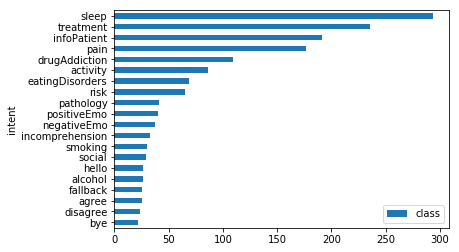

In [33]:
clf_res.groupby('intent').count().sort_values('class').plot(kind='barh')

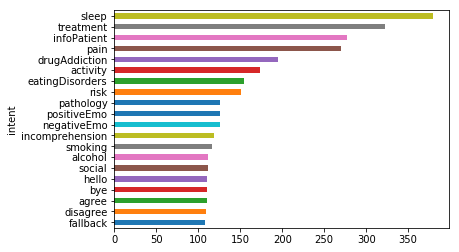

In [34]:
data.groupby('intent').count()['text'].sort_values().plot(kind='barh')

In [86]:
data.loc[0]

entities        [{'start': 34, 'end': 38, 'value': 'wine', 'en...
intent                                                    alcohol
text            I’m drinking at least a bottle of wine a day i...
clean_text               [drink, little, bottle, wine, day, week]
bow              [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]
len                                                             6
lda_features    [0.009388589300215244, 0.008225347846746445, 0...
Name: 0, dtype: object

## Label new data

In [42]:
import json

In [74]:
posts = list(map(lambda x: x['post'], json.loads(open('subset.json', 'r').read())))[:100]

In [187]:
posts = json.loads(open('selected_posts.json', 'r').read())[:1000]

In [46]:
import spacy
nlp = spacy.blank('en')
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [47]:
import nltk,re

def get_good_tokens(sentence):
    stopwords = nltk.corpus.stopwords.words('english')+['pron']        
    
    replaced_punctation = list(map(lambda token: re.sub('[^0-9A-Za-z]+', '', token), sentence))
    replaced_numbers = list(map(lambda token: re.sub('[0-9]+', '_num_', token), replaced_punctation))
    removed_punctation = list(filter(lambda token: token, replaced_numbers))
    removed_stopwords = list(filter(lambda token: token not in stopwords, removed_punctation))
    return removed_stopwords

In [48]:
import re
pat = re.compile(r'This message has been edited by \w+')

In [188]:
tokenized_posts = list(map(lambda post: 
                           list((get_good_tokens([token.text.lower() for token in sent]), sent)
                                for sent in nlp(post).sents if not re.search(pat, str(sent))), 
                    posts))

In [189]:
tokenized_posts = sum(tokenized_posts, [])

In [190]:
tokenized_posts[0]

(['posted', 'last', 'month', 'surgery', 'monday', 'morning'],
 I posted here last month, and they're doing the surgery Monday morning.)

In [238]:
filtered_tokenized_posts = list(filter(lambda x: len(x[0])<=7, tokenized_posts))

In [239]:
new_data = pd.DataFrame(filtered_tokenized_posts, columns=['clean_text', 'text'])

In [240]:
new_data.text = new_data.text.apply(lambda x: ' '.join([word.text for word in x]))

In [241]:
new_data['bow'] = list(map(lambda doc: dictionary.doc2bow(doc), new_data.clean_text))

In [242]:
new_data['lda_features'] = list(map(lambda doc:
                                      document_to_lda_features(LDAmodel, doc),
                                      new_data.bow))

In [56]:
new_data.head()

,clean_text,text,bow,lda_features
0,"[posted, last, month, surgery, monday, morning]","I posted here last month , and they 're doing ...","[(12, 1), (52, 1), (101, 1), (844, 1)]","[0.002819203305989504, 0.0026985215954482555, ..."
1,"[going, cut, suture, pyloric, muscle, open, ho...",They 're going in to cut and re - suture my ...,"[(69, 1), (131, 1), (156, 1), (966, 1)]","[0.002819203305989504, 0.21034693717956543, 0...."
2,"[gastroparesis, muscle, nt, open]","I have gastroparesis , that muscle does n't ...","[(966, 1)]","[0.007048008032143116, 0.5067462921142578, 0.0..."
3,"[_num_, hour, surgery, hospital, least, _num_,...",It 's a 2 hour surgery and I 'll be in the h...,"[(27, 2), (362, 1), (399, 1), (1355, 1), (1566...","[0.0020137166138738394, 0.03308305889368057, 0..."
4,"[shashy, hope, recovering, nicely, feeling, be...",\n\n Shashy \n\n I hope you are recovering n...,"[(651, 1)]","[0.5070480108261108, 0.0067463042214512825, 0...."


In [243]:
X_new_lda = np.array(list(map(np.array, new_data.lda_features)))

In [244]:
new_data['prediction'] = clf.predict(X_new_lda)
new_data['proba'] = clf.predict_proba(X_new_lda).max(axis=1)

In [197]:
pd.set_option('max_colwidth', 800)

In [178]:
Counter(sum(data[data.intent == 'sleep'].clean_text.values, [])).most_common(10)

[('sleep', 214),
 ('_num_', 154),
 ('wake', 62),
 ('night', 58),
 ('hour', 48),
 ('go', 40),
 ('feel', 40),
 ('fall', 32),
 ('asleep', 32),
 ('get', 30)]

In [198]:
new_data.sort_values('proba', ascending=False)[['text', 'proba', 'prediction', 'clean_text']]

,text,proba,prediction,clean_text
27951,Colonoscopy and endoscopy back to back \n 7 .,0.970506,sleep,"[colonoscopy, endoscopy, back, back, _num_]"
9131,"It lasted for about 8 months , subsided for about 4 months , and is now back .",0.970506,sleep,"[lasted, _num_, months, subsided, _num_, months, back]"
49161,\n\n Optimum studies require 6 hours of baseline sleep data and 6 hours of titration sleep data .,0.966181,sleep,"[optimum, studies, require, _num_, hours, baseline, sleep, data, _num_, hours, titration, sleep, data]"
36490,I now sleep longer - I get at least 8 hours of sleep a night .,0.950290,sleep,"[sleep, longer, get, least, _num_, hours, sleep, night]"
43120,"So now I can sleep 6 - 7 hours a night , but I do n't wake up .",0.948801,sleep,"[sleep, _num_, _num_, hours, night, nt, wake]"
4488,I do sleep at night .,0.943470,sleep,"[sleep, night]"
23669,\n\n I was 25 y / o when i injured my back .,0.943470,sleep,"[_num_, injured, back]"
45203,It works for me but the sleep periods are short-4 to 5 hours .,0.943470,sleep,"[works, sleep, periods, short_num_, _num_, hours]"
13007,Some nights I can sleep better and some nights I can not sleep at all .,0.943470,sleep,"[nights, sleep, better, nights, sleep]"
33382,"It slowed then stopped , back to sleep .",0.943470,sleep,"[slowed, stopped, back, sleep]"


In [60]:
data.intent.unique()

array(['alcohol', 'eatingDisorders', 'pathology', 'drugAddiction',
       'smoking', 'treatment', 'sleep', 'infoPatient', 'pain', 'activity',
       'incomprehension', 'negativeEmo', 'positiveEmo', 'fallback',
       'social', 'agree', 'disagree', 'hello', 'bye', 'risk'],
      dtype=object)

In [199]:
new_data[new_data.prediction == 'pain']\
    .sort_values('proba', ascending=False)[['text', 'proba', 'clean_text']]

,text,proba,clean_text
48892,"\n\n 3 - 9 months - Coughs , wheezing and breathing problems improve as lung function is increased by up to 10 % .",0.770735,"[_num_, _num_, months, coughs, wheezing, breathing, problems, improve, lung, function, increased, _num_]"
16432,The fact that pot is not pysically addictive is what makes pot so dangerous .,0.748442,"[fact, pot, pysically, addictive, makes, pot, dangerous]"
30488,I am an addict in recovery ( just celebrated 4 years clean Dec. 1 ! ! ! ! ! ),0.748442,"[addict, recovery, celebrated, _num_, years, clean, dec, _num_]"
10194,I find the 6 foot hose easier to clean anyway .,0.748442,"[find, _num_, foot, hose, easier, clean, anyway]"
45430,"The Vicodin was eventually only for "" breakthru "" pain in the afternoon .",0.706403,"[vicodin, eventually, breakthru, pain, afternoon]"
42745,"Thanks and ( if it 's not too mushy ) hugs , CMP / MM \n\n Cmpgrl , thanks for your note .",0.706403,"[thanks, mushy, hugs, cmp, mm, cmpgrl, thanks, note]"
26126,bloating as if I am 6 months pregnant \n 4 .,0.706403,"[bloating, _num_, months, pregnant, _num_]"
47729,I guess we 'll find out on Monday ... thanks again .,0.706403,"[guess, find, monday, thanks]"
15050,All the best \n Day 2 sober for me .,0.706403,"[best, day, _num_, sober]"
24284,I only got 5 hours each Monday and Tuesday .,0.706403,"[got, _num_, hours, monday, tuesday]"


In [133]:
new_data.loc[4216].text

"  I see one for severe reflux and a condition called Barrett 's esophagus which is a precancerous condition ."

In [245]:
clustering = KMeans(85).fit(X_new_lda)

In [217]:
clusters_scores = []
for k in range(10,100,10):
    print(k)
    clustering = KMeans(k).fit(X_new_lda)

    comp = pd.DataFrame(new_data[['text', 'prediction']])
    comp['clusters'] = clustering.predict(X_new_lda)
    clusters_scores += [(
        clustering.score(X_new_lda),
        silhouette_score(X_new_lda, comp['clusters']),
        k)
    ]

10
20
30
40
50
60
70
80
90


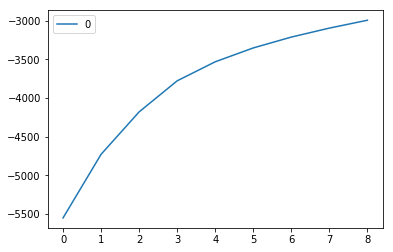

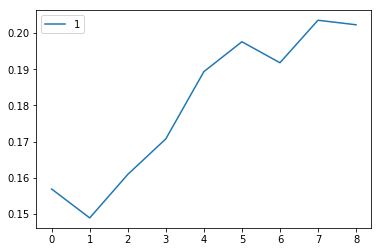

In [218]:
pd.DataFrame(clusters_scores)[[0]].plot(),
pd.DataFrame(clusters_scores)[[1]].plot()

In [219]:
clusters_scores

[(-5549.707769680422, 0.15690609169658593, 10),
 (-4726.982997161291, 0.14892753915444465, 20),
 (-4178.376460294012, 0.16093505679113376, 30),
 (-3776.714515284609, 0.1707563570005523, 40),
 (-3530.5054627187096, 0.1893317556358193, 50),
 (-3351.409327225314, 0.19759408407702203, 60),
 (-3211.0932437415104, 0.19179453714473466, 70),
 (-3094.957946801408, 0.20353422046244354, 80),
 (-2993.3331863945573, 0.20228456887642296, 90)]

In [100]:
clustering.score(X_new_lda)

-592.9953714344127

In [102]:
clustering.score(X_new_lda)

-563.2322182364401

In [221]:
comp = pd.DataFrame(new_data[['text', 'prediction']])

In [222]:
comp['clusters'] = clustering.predict(X_new_lda)

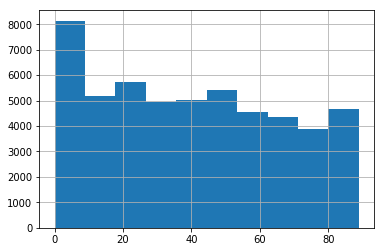

In [223]:
comp['clusters'].hist()

In [224]:
r = pd.pivot_table(comp, index='prediction', columns='clusters', aggfunc=len, fill_value=0)\
            .style.background_gradient(axis=1)

In [225]:
r

In [248]:
new_data['cluster'] = clustering.predict(X_new_lda)

In [247]:
new_data.prediction.unique()

array(['sleep', 'social', 'agree', 'pain', 'drugAddiction', 'infoPatient',
       'eatingDisorders', 'treatment', 'positiveEmo', 'risk', 'bye',
       'pathology', 'disagree', 'activity', 'alcohol', 'hello',
       'incomprehension', 'fallback', 'smoking', 'negativeEmo'],
      dtype=object)

In [249]:
new_data[new_data.prediction == 'social']\
    .sort_values('proba', ascending=False)[['text', 'proba', 'clean_text', 'cluster']]

,text,proba,clean_text,cluster
1770,I honestly don`t want to repeat that experience ever again .,0.289905,"[honestly, dont, want, repeat, experience, ever]",79
28098,I never would want to repeat the nightmare i had to go through .,0.281964,"[never, would, want, repeat, nightmare, go]",25
30088,\n\n If anyone knows of anything I would greatly appreciate the help .,0.275833,"[anyone, knows, anything, would, greatly, appreciate, help]",25
16380,"If i think of anything that i have forgotten i will post again , please help ?",0.269573,"[think, anything, forgotten, post, please, help]",4
2382,\n Anyone else ever experience this ?,0.268358,"[anyone, else, ever, experience]",4
2205,"all they can do is offer you help , or see that you are getting help by a doctor .",0.268357,"[offer, help, see, getting, help, doctor]",4
19377,is there anyone else who is watching their partner go through the same thing ?,0.266342,"[anyone, else, watching, partner, go, thing]",4
9562,"Now , I ca n't see how I would ever want that .",0.261202,"[ca, nt, see, would, ever, want]",4
20400,Anybody else here go through anything simular ?,0.259179,"[anybody, else, go, anything, simular]",79
20836,I want answers and I want this to go away .,0.259177,"[want, answers, want, go, away]",79


In [253]:
new_data[new_data.cluster == 5]\
    .sort_values('proba', ascending=False)[['text', 'proba', 'clean_text', 'cluster', 'prediction']]

,text,proba,clean_text,cluster,prediction
3332,in the mean time may also help .,0.438399,"[mean, time, may, also, help]",5,alcohol
12224,Cravings have been gone for many yrs and I weigh less than I ever have .,0.410292,"[cravings, gone, many, yrs, weigh, less, ever]",5,eatingDisorders
9015,"I can not stop on my own will , I 've tried so many times , and I always get thirsty .",0.385345,"[stop, tried, many, times, always, get, thirsty]",5,bye
6577,20 min of sun a day increases the Vit .,0.364632,"[_num_, min, sun, day, increases, vit]",5,bye
19204,"If he passes your first 3 tests , do n’t stop there .",0.364632,"[passes, first, _num_, tests, nt, stop]",5,bye
21340,The first 3 or 4 days are the worst .,0.364632,"[first, _num_, _num_, days, worst]",5,bye
4911,"HELP , we are at wit 's end after 3 months .",0.364631,"[help, wit, end, _num_, months]",5,bye
21746,I have always been a Type A personality and that does n't help .,0.361386,"[always, type, personality, nt, help]",5,bye
6732,"\n\n Just be kind to yourself stop beating yourself up , and I am proud of you standing up for yourself with that tommy person .",0.359072,"[kind, stop, beating, proud, standing, tommy, person]",5,bye
27964,I get the vegetarian burrito bowl .,0.345264,"[get, vegetarian, burrito, bowl]",5,bye


In [180]:
new_data[new_data.proba>0.6][new_data.cluster == 22].groupby('prediction').mean()['proba'].sort_values(ascending=False)

/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Series([], Name: proba, dtype: float64)

In [251]:
new_data[new_data.proba>0.2].groupby(['cluster', 'prediction']).sum()

proba
cluster prediction                 
0       alcohol            0.972772
        drugAddiction      0.408109
        eatingDisorders    0.602282
        infoPatient        5.001304
        sleep              1.327466
        treatment          0.561008
1       agree             10.110329
2       eatingDisorders    0.206602
        hello              0.762552
        treatment          1.064027
3       pain             461.152060
4       social            32.752555
5       alcohol            0.760150
        bye               75.149714
        eatingDisorders    4.894150
        infoPatient        0.214654
        risk               0.200550
        smoking            0.286704
        treatment          0.203817
6       alcohol            2.549191
        drugAddiction      3.482859
        eatingDisorders    0.682479
        infoPatient        0.507687
        pain              10.277907
        sleep              3.278248
        smoking            1.514104
        treatment          0.545139
7       positiveEmo        0.891372
        sleep              0.202180
        social             0.201332
...                             ...
79      alcohol            0.429881
        social            40.815912
80      alcohol            1.723409
        eatingDisorders    0.586466
        infoPatient        5.652893
        sleep              2.778325
        smoking            1.094768
        treatment          1.858204
81      alcohol            1.368253
        bye                2.064902
        hello              0.840504
        infoPatient        0.557033
        pain               1.211335
        sleep             26.267619
        smoking            0.625253
        treatment          0.274403
82      alcohol            0.210485
        pain              21.928255
83      alcohol            1.828423
        bye                0.243180
        eatingDisorders    0.428286
        sleep              4.326253
        smoking            1.761747
        treatment          0.415128
84      alcohol            2.370730
        eatingDisorders    5.333973
        infoPatient        0.244382
        pain               0.401498
        smoking            0.733236
        treatment          0.920786

[397 rows x 1 columns]

In [258]:
new_data[new_data.proba>0.2].groupby(['cluster', 'prediction']).count()['proba']#.sort_values(ascending=False)

cluster  prediction     
0        alcohol               4
         drugAddiction         2
         eatingDisorders       2
         infoPatient          15
         sleep                 5
         treatment             2
1        agree                49
2        eatingDisorders       1
         hello                 3
         treatment             4
3        pain               1068
4        social              148
5        alcohol               2
         bye                 332
         eatingDisorders      20
         infoPatient           1
         risk                  1
         smoking               1
         treatment             1
6        alcohol               8
         drugAddiction        16
         eatingDisorders       3
         infoPatient           2
         pain                 28
         sleep                10
         smoking               5
         treatment             2
7        positiveEmo           4
         sleep                 1
         social   

In [291]:
new_data[new_data.proba>0.6].groupby(['cluster', 'prediction']).count()['proba']#.plot(kind='box')

cluster  prediction     
0        infoPatient          1
3        pain               104
10       sleep                1
13       infoPatient          1
14       infoPatient          5
15       treatment          157
30       alcohol              9
33       sleep                2
36       infoPatient         23
38       sleep              124
42       treatment            1
45       sleep               16
49       smoking             88
56       treatment          127
59       sleep                3
68       sleep               12
70       sleep                1
76       eatingDisorders     32
81       sleep                3
Name: proba, dtype: int64

In [403]:
def filter_data(new_data, proba_threshold, population_threshold=None):
    by_proba = new_data[new_data.proba>proba_threshold]
    del by_proba['bow']
    del by_proba['lda_features']
    population = by_proba.groupby(['cluster', 'prediction']).count()['proba']
    if not population_threshold:
        population_threshold = int(population.mean())
    print(population_threshold)
    population = population.reset_index().groupby('cluster').max()
    clusters_to_leave = population[population.proba>population_threshold].index
    by_population = by_proba[by_proba.cluster.isin(clusters_to_leave)]
    
    new_labels = {}
    res = pd.DataFrame()
    
    for cluster_num in clusters_to_leave:
        new_labels[cluster_num] = by_population[by_population.cluster==cluster_num].groupby('prediction')\
            .sum()['proba'].sort_values().index[-1]
    
    by_population.loc[:, ('cluster')] = by_population.loc[:, ('cluster')].apply(lambda x: new_labels[x])
    res = by_population.sort_values(['cluster', 'proba'], ascending=False).groupby('cluster').head(population_threshold)
    return res
    

In [405]:
res = filter_data(new_data, 0.25, 30)

30


In [407]:
res

,clean_text,text,prediction,proba,cluster
26678,"[take, high, dose, mood, stabilizer, anyway]","I take a high dose as a mood stabilizer , anyway .",treatment,0.935463,treatment
4092,"[take, _num_, _num_, pills, day]",I take between 13 - 16 pills a day .,treatment,0.931473,treatment
26857,"[says, take, _num_, take, _num_]",It says to take 2 but I take 3 .,treatment,0.930734,treatment
15851,"[tried, lower, dose, yet]",Have not tried a lower dose yet .,treatment,0.917652,treatment
5387,"[need, take, lowest, dosesilenor, wayor, increasing, dose]",Do I need to take the lowest dose(silenor way)or increasing the dose ? .,treatment,0.911026,treatment
20997,"[enrty, day, _num_, today, sucks]","\n ( enrty from day 13 , "" today sucks ! "")",treatment,0.907611,treatment
12373,"[marilyn, today, day, _num_]",\n\n Marilyn \n -- Today is day 15 .,treatment,0.907611,treatment
8582,"[today, day, _num_, taking, chantix]",so today is day # 4 of taking Chantix .,treatment,0.907207,treatment
4978,"[need, extra, day, take, without, shame]","I do this for me , and if I need extra on the day I take it without any shame .",treatment,0.904559,treatment
20900,"[take, care, god, bless, day, _num_, _num_me]",\n\n Take Care and God Bless You \n\n day 24 4Me,treatment,0.900742,treatment


In [329]:
res[res.cluster==6].groupby('prediction').count()['cluster'] / len(res[res.cluster==6])

prediction
alcohol            0.166667
drugAddiction      0.020833
eatingDisorders    0.020833
infoPatient        0.020833
pain               0.458333
sleep              0.187500
smoking            0.083333
treatment          0.041667
Name: cluster, dtype: float64

In [406]:
filter_data(new_data, 0.05).groupby('cluster').count()

31


,clean_text,text,prediction,proba
cluster,,,,
activity,31,31,31,31
agree,31,31,31,31
alcohol,31,31,31,31
bye,31,31,31,31
disagree,31,31,31,31
drugAddiction,31,31,31,31
eatingDisorders,31,31,31,31
fallback,31,31,31,31
hello,31,31,31,31
